# Прогнозирование оттока клиентов в сети отелей «Как в гостях»

# Описание проекта 

**Заказчик этого исследования — сеть отелей «Как в гостях».**

Чтобы привлечь клиентов, эта сеть отелей добавила на свой сайт возможность забронировать номер без предоплаты. Однако если клиент отменял бронирование, то компания терпела убытки. Сотрудники отеля могли, например, закупить продукты к приезду гостя или просто не успеть найти другого клиента.
Чтобы решить эту проблему, вам нужно разработать систему, которая предсказывает отказ от брони. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.


**Бизнес-метрика и другие данные:**
Основная бизнес-метрика для любой сети отелей — её прибыль. Прибыль отеля — это разница между стоимостью номера за все ночи и затраты на обслуживание: как при подготовке номера, так и при проживании постояльца. 
В отеле есть несколько типов номеров. В зависимости от типа номера назначается стоимость за одну ночь. Есть также затраты на уборку. Если клиент снял номер надолго, то убираются каждые два дня. 
Стоимость номеров отеля:
- категория A: за ночь — 1 000, разовое обслуживание — 400;
- категория B: за ночь — 800, разовое обслуживание — 350;
- категория C: за ночь — 600, разовое обслуживание — 350;
- категория D: за ночь — 550, разовое обслуживание — 150;
- категория E: за ночь — 500, разовое обслуживание — 150;
- категория F: за ночь — 450, разовое обслуживание — 150;
- категория G: за ночь — 350, разовое обслуживание — 150.


В ценовой политике отеля используются сезонные коэффициенты: весной и осенью цены повышаются на 20%, летом — на 40%.
Убытки отеля в случае отмены брони номера — это стоимость одной уборки и одной ночи с учётом сезонного коэффициента.
На разработку системы прогнозирования заложен бюджет — 400 000. При этом необходимо учесть, что внедрение модели должно окупиться за тестовый период. Затраты на разработку должны быть меньше той выручки, которую система принесёт компании.

# Описание данных

/datasets/hotel_train.csv — данные для обучения модели

/datasets/hotel_test.csv — данные для тестирования модели

В таблицах `hotel_train`  и `hotel_test`  содержатся одинаковые столбцы:
- `id`  — номер записи;
- `adults`  — количество взрослых постояльцев;
- `arrival_date_year`  — год заезда;
- `arrival_date_month`  — месяц заезда;
- `arrival_date_week_number`  — неделя заезда;
- `arrival_date_day_of_month`  — день заезда;
- `babies`  — количество младенцев;
- `booking_changes`  — количество изменений параметров заказа;
- `children`  — количество детей от 3 до 14 лет;
- `country`  — гражданство постояльца;
- `customer_type`  — тип заказчика:
- `Contract`  — договор с юридическим лицом;
- `Group`  — групповой заезд;
- `Transient`  — не связано с договором или групповым заездом;
- `Transient-party`  — не связано с договором или групповым заездом, но связано с бронированием типа Transient.
- `days_in_waiting_list`  — сколько дней заказ ожидал подтверждения;
- `distribution_channel`  — канал дистрибуции заказа;
- `is_canceled`  — отмена заказа;
- `is_repeated_guest`  — признак того, что гость бронирует номер второй раз;
- `lead_time`  — количество дней между датой бронирования и датой прибытия;
- `meal`  — опции заказа:
- `SC`  — нет дополнительных опций;
- `BB`  — включён завтрак;
- `HB`  — включён завтрак и обед;
- `FB`  — включён завтрак, обед и ужин.
- `previous_bookings_not_canceled`  — количество подтверждённых заказов у клиента;
- `previous_cancellations`  — количество отменённых заказов у клиента;
- `required_car_parking_spaces`  — необходимость места для автомобиля;
- `reserved_room_type`  — тип забронированной комнаты;
- `stays_in_weekend_nights`  — количество ночей в выходные дни;
- `stays_in_week_nights`  — количество ночей в будние дни;
- `total_nights`  — общее количество ночей;
- `total_of_special_requests`  — количество специальных отметок.

**Импорт необходимых библиотек:**

In [1]:
pip install --upgrade pip

     |████████████████████████████████| 2.1 MB 1.0 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade Pillow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 11.0 MB/s eta 0:00:0000:010:01
  Attempting uninstall: Pillow
    Found existing installation: Pillow 8.4.0
    Uninstalling Pillow-8.4.0:
      Successfully uninstalled Pillow-8.4.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
#!pip install ydata-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.2/65.2 kB 798.5 kB/s eta 0:00:00 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 2.5 MB/s eta 0:00:0000:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.8/679.8 kB 6.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 35.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 53.8 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.5/357.5 kB 25.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 54.2 MB/s eta 0:00:00:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 460.4/460.4 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
#!pip install pandas-profiling

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 2.1 MB/s eta 0:00:00a 0:00:01
  Using cached numpy-1.22.4-cp39-cp39-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.1
    Uninstalling numpy-1.21.1:
      Successfully uninstalled numpy-1.21.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spacy 3.2.0 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.5.2 which is incompatible.
thinc 8.0.17 requires pydantic!=1.8,!=1.8.1,<1.9.0,>=1.7.4, but you have pydantic 2.5.2 which is incompatible.


In [5]:
import pandas as pd
from ydata_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.offline as pyo
import plotly.express as px
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from scipy import stats as st
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, precision_score, recall_score, roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from tqdm import tqdm
from sklearn.metrics import make_scorer
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn import set_config
from sklearn.dummy import DummyClassifier

### Шаг 1. Откройте файлы с данными

**Данные для обучения моделей:**

In [6]:
hotel_train = pd.read_csv('/datasets/hotel_train.csv')

**Данные для тестирования модели:**

In [7]:
hotel_test = pd.read_csv('/datasets/hotel_test.csv')

### Шаг 2. Предобработка и исследовательский анализ данных

- Проверим данные и откорректируем их, если потребуется.
- Проведем исследовательский анализ представленных данных. Опишем найденные особенности: пропуски, выбросы.

In [8]:
hotel_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65229 entries, 0 to 65228
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              65229 non-null  int64  
 1   is_canceled                     65229 non-null  int64  
 2   lead_time                       65229 non-null  float64
 3   arrival_date_year               65229 non-null  int64  
 4   arrival_date_month              65229 non-null  object 
 5   arrival_date_week_number        65229 non-null  int64  
 6   arrival_date_day_of_month       65229 non-null  int64  
 7   stays_in_weekend_nights         65229 non-null  int64  
 8   stays_in_week_nights            65229 non-null  int64  
 9   adults                          65229 non-null  float64
 10  children                        65229 non-null  float64
 11  babies                          65229 non-null  float64
 12  meal                            

In [9]:
hotel_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32412 entries, 0 to 32411
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32412 non-null  int64  
 1   is_canceled                     32412 non-null  int64  
 2   lead_time                       32412 non-null  float64
 3   arrival_date_year               32412 non-null  int64  
 4   arrival_date_month              32412 non-null  object 
 5   arrival_date_week_number        32412 non-null  int64  
 6   arrival_date_day_of_month       32412 non-null  int64  
 7   stays_in_weekend_nights         32412 non-null  int64  
 8   stays_in_week_nights            32412 non-null  int64  
 9   adults                          32412 non-null  float64
 10  children                        32412 non-null  float64
 11  babies                          32412 non-null  float64
 12  meal                            

In [10]:
hotel_train.sample(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
6001,6078,1,10.0,2016,December,53,30,1,2,1.0,...,0,0,0,A,1,0,Transient-Party,0,0,3
25273,33213,1,5.0,2016,April,15,4,3,5,2.0,...,0,0,0,D,0,0,Transient,0,0,8
59030,77697,0,346.0,2016,September,38,13,0,2,2.0,...,0,0,0,A,0,0,Transient-Party,0,1,2
32861,40801,1,39.0,2016,September,40,25,1,0,1.0,...,0,0,0,A,0,0,Transient,0,0,1
29424,37364,1,15.0,2016,June,25,17,2,2,3.0,...,0,0,0,D,0,0,Transient,0,0,4


In [11]:
hotel_test.sample(5)

,id,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights
9351,46540,1,134.0,2017,February,8,25,0,1,1.0,...,0,0,0,A,0,0,Transient-Party,0,0,1
12636,49825,1,15.0,2017,May,18,4,0,2,2.0,...,0,0,0,A,0,0,Transient,0,1,2
26709,92201,0,50.0,2017,May,21,22,1,3,2.0,...,0,0,0,D,0,0,Transient,0,1,4
16749,53938,1,351.0,2017,July,29,18,0,4,3.0,...,0,0,0,D,0,0,Transient,0,0,4
27038,92530,0,119.0,2017,May,22,29,1,1,2.0,...,0,0,0,A,0,0,Transient,0,0,2


In [ ]:
#profile_train = ProfileReport(hotel_train, title="Pandas Profiling Report")

# запускаем показ профиля
#profile_train

In [ ]:
#profile_test = ProfileReport(hotel_test, title="Pandas Profiling Report")

# запускаем показ профиля
#profile_test

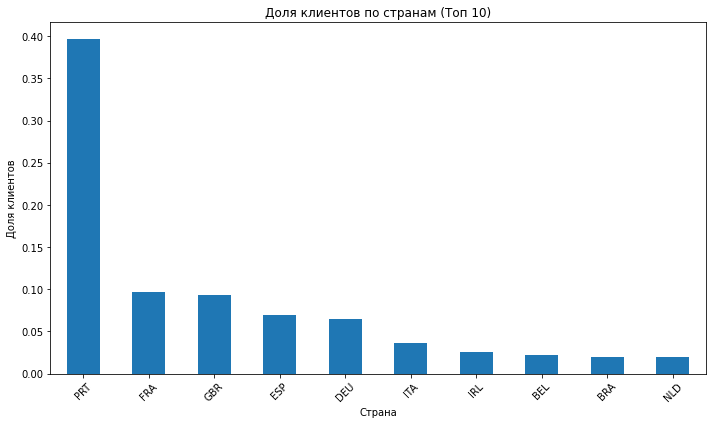

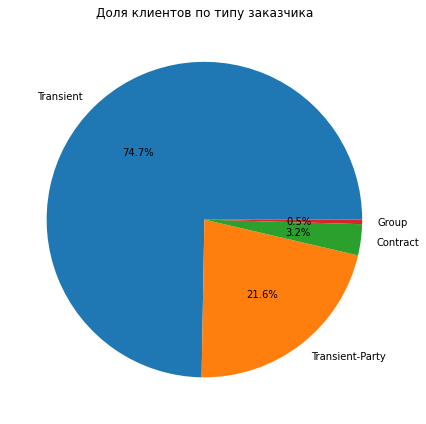

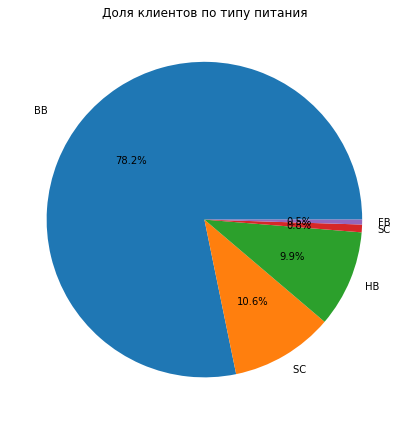

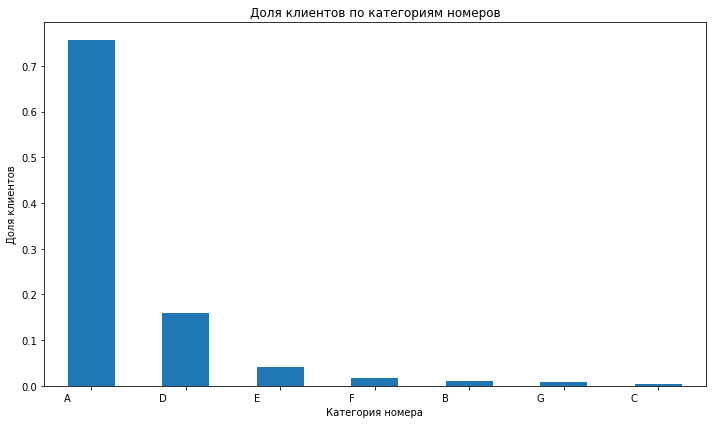

In [14]:
hotel_data = pd.concat([hotel_train, hotel_test])

# Визуализация доли клиентов по странам
plt.figure(figsize=(10, 6))
country_counts = hotel_data['country'].value_counts(normalize=True).head(10)
country_counts.plot(kind='bar')
plt.title('Доля клиентов по странам (Топ 10)')
plt.xlabel('Страна')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Визуализация доли клиентов по типу заказчика
plt.figure(figsize=(8, 6))
customer_type_counts = hotel_data['customer_type'].value_counts(normalize=True)
customer_type_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля клиентов по типу заказчика')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Визуализация доли клиентов по типу питания
plt.figure(figsize=(8, 6))
meal_counts = hotel_data['meal'].value_counts(normalize=True)
meal_counts.plot(kind='pie', autopct='%1.1f%%')
plt.title('Доля клиентов по типу питания')
plt.ylabel('')
plt.tight_layout()
plt.show()

# Визуализация доли клиентов по категориям номеров
plt.figure(figsize=(10, 6))
room_type_counts = hotel_data['reserved_room_type'].value_counts(normalize=True)
room_type_counts.plot(kind='bar')
plt.title('Доля клиентов по категориям номеров')
plt.xlabel('Категория номера')
plt.ylabel('Доля клиентов')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

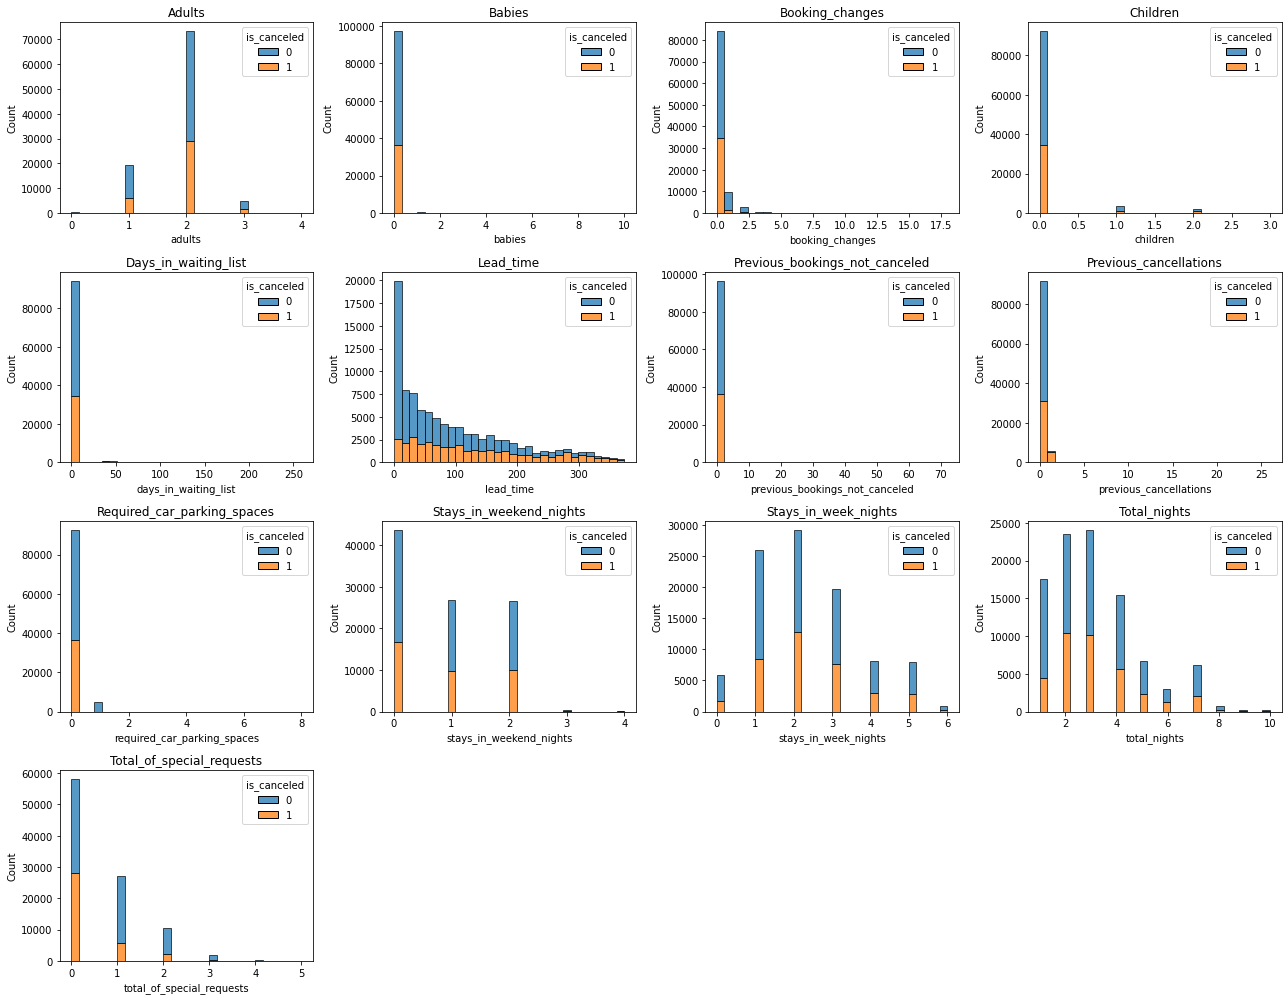

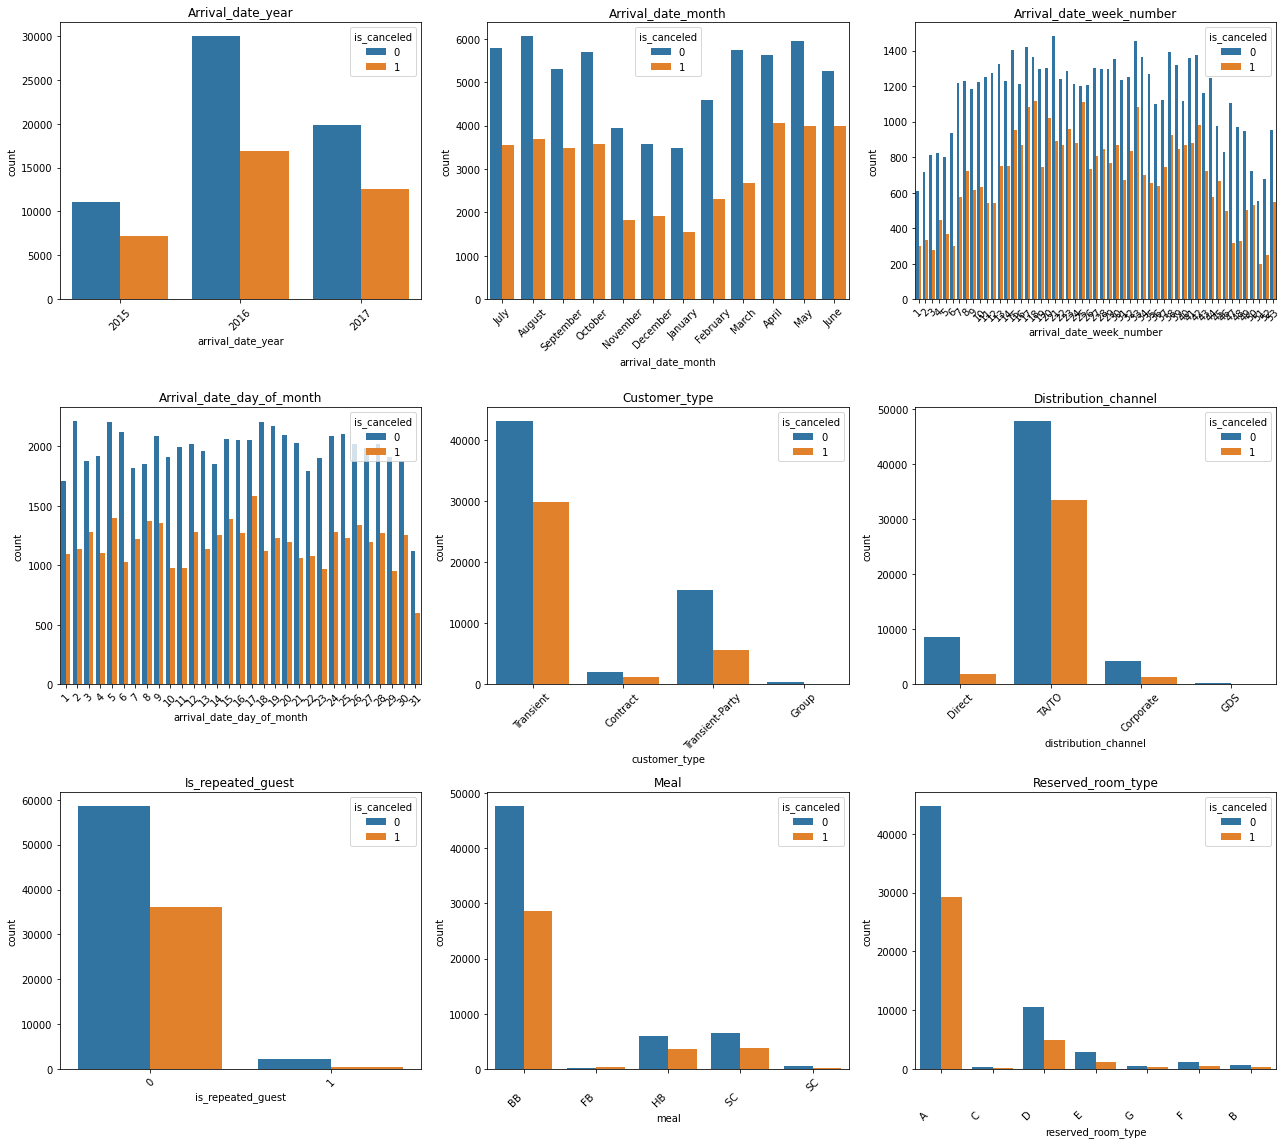

In [15]:

numerical_columns = ['adults', 'babies', 'booking_changes', 'children', 'days_in_waiting_list', 
                     'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations', 
                     'required_car_parking_spaces', 'stays_in_weekend_nights', 'stays_in_week_nights', 
                     'total_nights', 'total_of_special_requests']

plt.figure(figsize=(18, 14))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.histplot(data=hotel_data, x=col, hue='is_canceled', multiple='stack', bins=30)
    plt.title(f'{col.capitalize()}')
plt.tight_layout()
plt.show()


categorical_columns = ['arrival_date_year', 'arrival_date_month', 'arrival_date_week_number', 
                       'arrival_date_day_of_month', 'customer_type', 'distribution_channel', 
                       'is_repeated_guest', 'meal', 'reserved_room_type']

plt.figure(figsize=(18, 16))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=hotel_data, x=col, hue='is_canceled')
    plt.title(f'{col.capitalize()}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

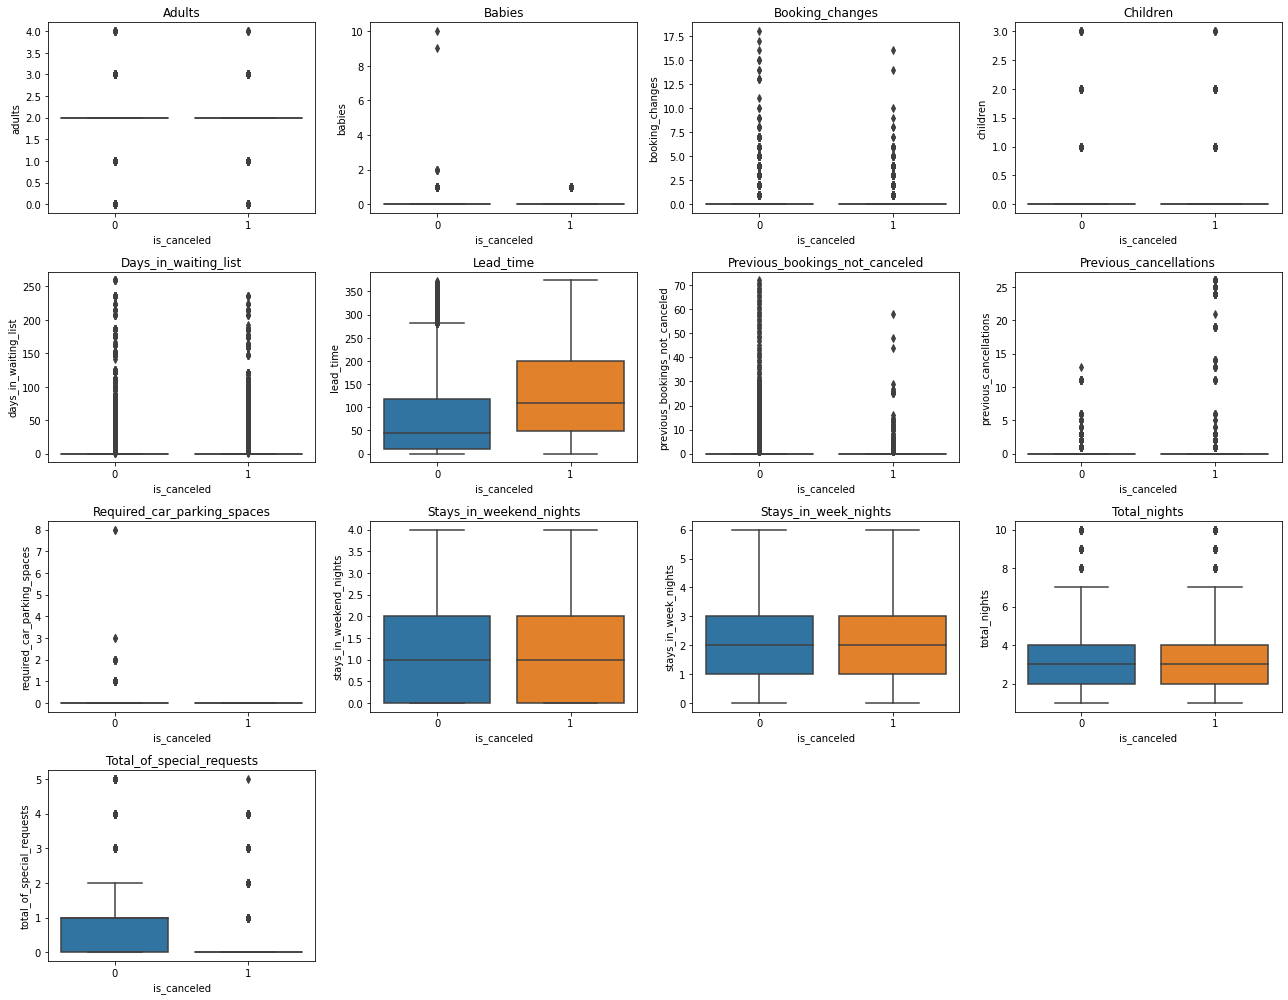

In [16]:
plt.figure(figsize=(18, 14))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(4, 4, i)
    sns.boxplot(data=hotel_data, x='is_canceled', y=col)
    plt.title(f'{col.capitalize()}')
plt.tight_layout()
plt.show()

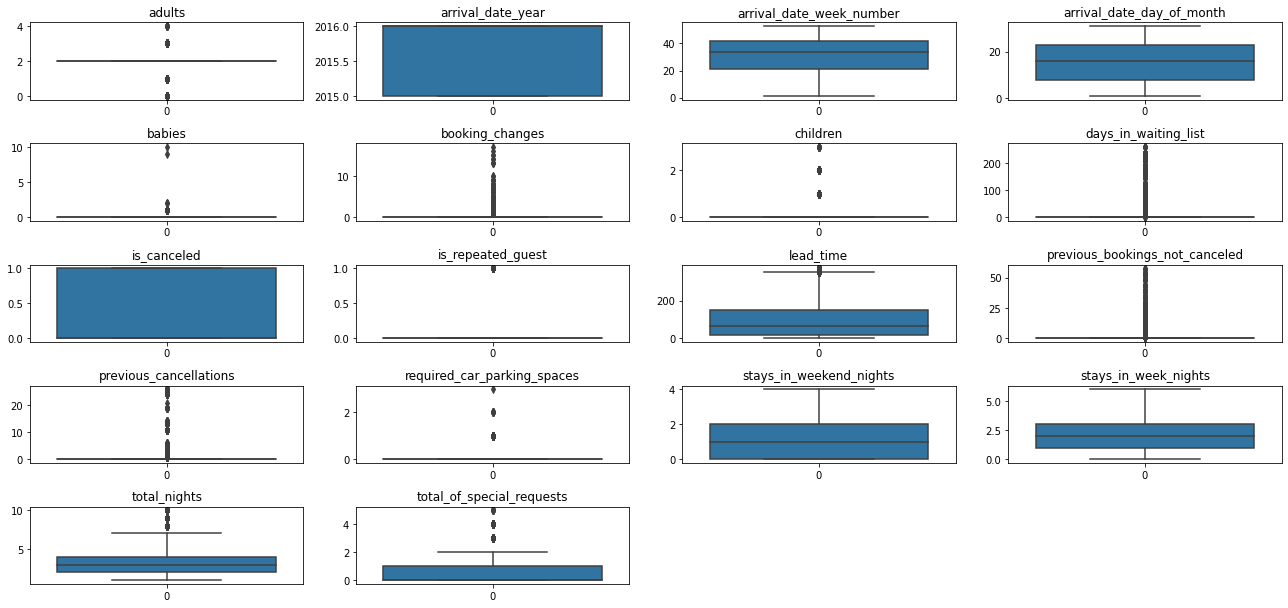

In [17]:

numeric_columns = ['adults', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month',
                   'babies', 'booking_changes', 'children', 'days_in_waiting_list', 'is_canceled',
                   'is_repeated_guest', 'lead_time', 'previous_bookings_not_canceled', 'previous_cancellations',
                   'required_car_parking_spaces', 'stays_in_weekend_nights', 'stays_in_week_nights',
                   'total_nights', 'total_of_special_requests']


plt.figure(figsize=(18, 10))

for i, column in enumerate(numeric_columns):
    plt.subplot(6, 4, i + 1) 
    sns.boxplot(data=hotel_train[column])  
    plt.title(column)  

plt.tight_layout()  
plt.show()  

Эти показатели могут очень сильно помочь бизнесу для планирования стратегии:

1. Почти половина туристов заселяется из Португалии, было бы очень продуктивно, если сеть давала таргетированную рекламу на данную страну, брала обратную связь от туристов, а также можно взять в штат сотрудников, владеющих португальским языком. 

2. По типу заказов почти 80% заселенцев никак не связаны с договором или групповым заездом, бизнес может сконцентрироваться на предоставлении персонализированных услуг. Это означает, что можно уделить больше внимания индивидуальным потребностям клиентов, улучшить обслуживание и создать более гибкую систему бронирования.

3. По типу питания так же почти 80% включают себе в услугу только завтрак, это позволяет бизнесу сосредоточиться на основной своей услуге. Можно улучшить качество завтраков, предложить больше вариантов и разнообразия, что может увеличить удовлетворенность клиентов.

4. Также большинство гостей предпочитают один и тот же тип номеров, это может быть полезной информацией для бизнеса: стоить сделать акцент на популярных номерах, ведь зная предпочтения клиентов, бизнес может уделить больше внимания и ресурсов на улучшение и поддержание популярных типов номеров. Это может включать обновление удобств, повышение комфорта и создание особых предложений для этих номеров.

5. А соотношение ушедших/оставшихся клиентов по признакам поможет выяснить явные проблемы, препятствующие возможному комфортному пребыванию или, например, сократить возможность бронирования за какой-то период, потому что чем раньше была бронь, тем выше шанс отказа. Но со всеми метриками надо быть аккуратнее, чтобы не отпугнуть постояльцев радикальными изменениями.

**В исходных датафреймах нет пропущенных и дублирующихся значений**

**Мы также можем удалить столбец `id`, так как наличие такого большого количества уникальных значений создает сложности для решения задачи, однако не приносит ценности для качества будущей модели:**

In [18]:
hotel_train.drop(columns='id', inplace=True)
hotel_test.drop(columns='id', inplace=True)

**Проверим не появились ли дубликаты после удаления столбец `id`:**

In [19]:
print(hotel_train.duplicated().value_counts())
print(hotel_test.duplicated().value_counts())

False    43852
True     21377
dtype: int64
False    24695
True      7717
dtype: int64


**К сожалению, предположение оказалось верным, но мы не можем выяснить их причину появления без более детальной информации. Так как даже без этих строк количество данных остаётся существенным для исследования, то принимаем решение об их удалении.**

In [20]:
hotel_train.drop_duplicates(inplace=True, ignore_index=True)
hotel_test.drop_duplicates(inplace=True, ignore_index=True)

**Перейдем к более детальному изучению наших данных и столбцов, используя pandas_profiling отчёты.**

**В столбцах `reserved_room_type - тип забронированной комнаты` и `meal - опции заказа` есть лишние пробелы, уберем их:**

In [21]:
unique_reserved_room_type = hotel_test['reserved_room_type'].unique()
print(unique_reserved_room_type)
unique_meal = hotel_test['meal'].unique()
print(unique_meal)

['A               ' 'E               ' 'G               '
 'D               ' 'F               ' 'C               '
 'B               ']
['BB       ' 'HB       ' 'SC' 'FB       ' 'SC       ']


In [22]:
# Убедимся, что все значения приведены к строковому типу 
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type'].astype(str)
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].astype(str)
hotel_train['meal'] = hotel_train['meal'].astype(str)
hotel_test['meal'] = hotel_test['meal'].astype(str)

# Убираем лишние пробелы
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type'].str.strip()
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type'].str.strip()
hotel_train['meal'] = hotel_train['meal'].str.strip()
hotel_test['meal'] = hotel_test['meal'].str.strip()

# Перезаписываем обновленные значения в столбцы
hotel_train['reserved_room_type'] = hotel_train['reserved_room_type']
hotel_test['reserved_room_type'] = hotel_test['reserved_room_type']
hotel_train['meal'] = hotel_train['meal']
hotel_test['meal'] = hotel_test['meal']

# Проверяем уникальные значения
unique_reserved_room_type = hotel_test['reserved_room_type'].unique()
print(unique_reserved_room_type)
unique_meal = hotel_test['meal'].unique()
print(unique_meal)

['A' 'E' 'G' 'D' 'F' 'C' 'B']
['BB' 'HB' 'SC' 'FB']


**В столбце `babies — количество младенцев` есть два аномальных значения с 9 и 10 младенцами. Избавимся от этих аномальных значений, все же у нас сеть отелей, а не дом малютки :)**

In [23]:
hotel_train = hotel_train[hotel_train['babies'] < 9]
hotel_test = hotel_test[hotel_test['babies'] < 9]

**В столбце `required_car_parking_spaces — необходимость места для автомобиля` тоже есть лишние значения, избавимся от них:**

In [24]:
hotel_train = hotel_train[hotel_train['required_car_parking_spaces'] <= 1]
hotel_test = hotel_test[hotel_test['required_car_parking_spaces'] <= 1]

**Вывод:**
- Выяснили, что в исходных датафреймах нет пропущенных и дублирующихся значений
- Удалили столбец id, так как наличие такого большого количества уникальных значений создает сложности для решения задачи, однако не приносит ценности для качества будущей модели, удалили дублирующиеся строки после удаления столбца
- В столбцах reserved_room_type - тип забронированной комнаты и meal - опции заказа были лишние пробелы, убрали их
- В столбце babies — количество младенцев было два аномальных значения с 9 и 10 младенцами. Избавились от этих аномальных значений, все же у нас сеть отелей, а не дом малютки :)
- В столбце required_car_parking_spaces — необходимость места для автомобиля тоже были лишние значения, избавились от них

### Шаг 3. Формулировка ML-задачи на основе бизнес-задачи

**Оценим прибыль отеля без внедрения депозитов:**

- Определим стоимость номеров и разового обслуживания: Зададим цены на различные типы номеров (room_prices) и их обслуживание.

**Создадим функцию для расчета доходности бронирования:**

- Расчет сезонного коэффициента: В зависимости от месяца заезда, определяется коэффициент сезонности, который влияет на цену номера.
- Расчет стоимости номера: Используются данные о типе зарезервированного номера, общем количестве ночей и сезонном коэффициенте для определения стоимости проживания.
- Расчет затрат на обслуживание: Затраты на уборку вычисляются в зависимости от количества ночей проживания и типа номера.
- Расчет затрат при отмене бронирования: Если бронь была отменена (is_canceled == 1), то учитывается убыток от отмены бронирования, который включает стоимость одной уборки и одной ночи с учетом сезонного коэффициента.
- Применение функции к данным Функция calculate_income применяется к каждой записи (строке) в DataFrame hotel_train и hotel_test, чтобы рассчитать доходность бронирования и записать результат в новый столбец income.

Этот код позволить оценить доходность отдельных бронирований, учитывая различные факторы, такие как тип номера, длительность проживания, сезонные изменения цен и статус отмены брони.

In [25]:
# Определение стоимости номеров и разового обслуживания
room_prices = {
    'A': {'night': 1000, 'service': 400},
    'B': {'night': 800, 'service': 350},
    'C': {'night': 600, 'service': 350},
    'D': {'night': 550, 'service': 150},
    'E': {'night': 500, 'service': 150},
    'F': {'night': 450, 'service': 150},
    'G': {'night': 350, 'service': 150}
}

# Функция для расчета доходности бронирования
def calculate_income(row):
    season_coefficient = 1.0
    if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
        season_coefficient += 0.2  # Повышение цен на 20% весной и осенью
    elif row['arrival_date_month'] in ['June', 'July', 'August']:
        season_coefficient += 0.4  # Повышение цен на 40% летом
    
    room_cost = room_prices[row['reserved_room_type']]['night'] * row['total_nights'] * season_coefficient
    service_cost = room_prices[row['reserved_room_type']]['service']
    
    cleaning_cost = service_cost * (row['total_nights'] // 2) if row['total_nights'] >= 2 else service_cost
    
    cancellation_cost = service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient
    
    total_income = -cancellation_cost if row['is_canceled'] == 1 else room_cost - cleaning_cost
    
    return total_income



# Применение функции к каждой записи в DataFrame (hotel_train или hotel_test)
hotel_train['income'] = hotel_train.apply(calculate_income, axis=1)
hotel_test['income'] = hotel_test.apply(calculate_income, axis=1)

In [26]:
def calculate_income(row):
    season_coefficient = 1.0
    if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
        season_coefficient += 0.2  # Повышение цен на 20% весной и осенью
    elif row['arrival_date_month'] in ['June', 'July', 'August']:
        season_coefficient += 0.4  # Повышение цен на 40% летом
    
    room_cost = room_prices[row['reserved_room_type']]['night'] * row['total_nights'] * season_coefficient
    service_cost = room_prices[row['reserved_room_type']]['service']
    
    # Расчет количества уборок
    cleanings = 1 + row['total_nights'] // 2
    
    # Расчет стоимости уборок
    cleaning_cost = service_cost * cleanings
    
    # Расчет стоимости отмены
    cancellation_cost = service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient
    
    # Расчет общего дохода
    total_income = -cancellation_cost if row['is_canceled'] == 1 else room_cost - cleaning_cost
    
    return total_income

# Применение функции к каждой записи в DataFrame (hotel_train или hotel_test)
hotel_train['income'] = hotel_train.apply(calculate_income, axis=1)
hotel_test['income'] = hotel_test.apply(calculate_income, axis=1)

In [27]:
hotel_train.sample(5)

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,booking_changes,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests,total_nights,income
35120,0,146.0,2016,July,28,8,0,1,2.0,0.0,...,0,0,D,0,0,Transient-Party,0,2,1,620.0
43800,0,1.0,2016,December,53,31,1,1,1.0,0.0,...,0,0,D,1,0,Transient,0,0,2,800.0
38383,0,1.0,2016,September,37,6,0,1,2.0,0.0,...,0,0,A,1,0,Transient,0,2,1,800.0
26938,0,0.0,2015,November,47,20,2,5,1.0,0.0,...,0,0,A,1,0,Transient,0,1,7,6800.0
37949,0,9.0,2016,October,42,13,0,2,1.0,0.0,...,0,2,A,0,0,Transient,1,1,2,1600.0


Построим сводную таблицу выручки по годам для двух датафреймов hotel_train и hotel_test одновременно:

In [28]:
# Объединяем данные из двух датафреймов
combined_data = pd.concat([hotel_train, hotel_test])

# Создаем столбец с годом из столбца arrival_date_year
combined_data['year'] = combined_data['arrival_date_year']

# Сводная таблица по годам и выручке
revenue_by_year = combined_data.pivot_table(values='income', index='year', aggfunc='sum')

print(revenue_by_year)

          income
year            
2015  17987230.0
2016  48428750.0
2017  32666790.0


**Вывод:**

- **Рассчитали доходность для каждой записи о бронировании в отеле на основе типа номера, количества забронированных ночей и сезонных факторов. Результаты сохранили в новый столбец income в соответствующих датафреймах hotel_train и hotel_test.**

### Шаг 4. Разработка модели ML

- Обучим разные модели и оцените их качество кросс-валидацией. Выберем лучшую модель и провермс её на тестовой выборке. Опишим выводы.
- Выберем метрику для обучения.
- Оценим прибыль, которую принесёт выбранная модель за год.

Проведем сравнительный анализ различных моделей машинного обучения с использованием кросс-валидации для оценки их производительности. Затем выберем наилучшую модель и протестируем ее на тестовом наборе данных.

Учитывая, что данные не сильно несбалансированы, будем использовать несколько метрик для оценки качества моделей: F1, Accuracy, матрицу ошибок, Precision, Recall и оценку прибыли.

Будем использовать гармоническое среднее F1 для выбора лучших гиперпараметров.

Кроме того, оценим потенциальную прибыль, которую сможет принести выбранная модель за последний год.

В качестве моделей для обучения мы рассматриваем три модели на основе ансамблей:

- RandomForestClassifier
- AdaBoostClassifier
- GradientBoostingClassifier


А также линейную модель и модель на методе опорных векторов:

- LogisticRegression
- LinearSVC


Это позволит нам сравнить эффективность различных типов моделей и выбрать наилучшую для нашей задачи.

**Напишем функцию для расчета прибыли моделей. Если модель покажет, что бронь будет отменена, то клиенту предлагается внести депозит. Размер депозита — 80% от стоимости номера за одни сутки и затрат на разовую уборку. Деньги будут списаны со счёта клиента, если он всё же отменит бронь.**

In [147]:
# # Определение стоимости номеров и разового обслуживания
# room_prices = {
#     'A': {'night': 1000, 'service': 400},
#     'B': {'night': 800, 'service': 350},
#     'C': {'night': 600, 'service': 350},
#     'D': {'night': 550, 'service': 150},
#     'E': {'night': 500, 'service': 150},
#     'F': {'night': 450, 'service': 150},
#     'G': {'night': 350, 'service': 150}
# }

# # Функция для расчета доходности бронирования
# def calculate_income_model(row):
#     season_coefficient = 1.0
#     if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
#         season_coefficient += 0.2  # Повышение цен на 20% весной и осенью
#     elif row['arrival_date_month'] in ['June', 'July', 'August']:
#         season_coefficient += 0.4  # Повышение цен на 40% летом
    
#     room_cost = room_prices[row['reserved_room_type']]['night'] * row['total_nights'] * season_coefficient
#     service_cost = room_prices[row['reserved_room_type']]['service']
    
#     cleaning_cost = service_cost * (row['total_nights'] // 2) if row['total_nights'] >= 2 else service_cost
    
#     deposit = 0.8 * (service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient)
    
#     total_income = +deposit if row['is_canceled'] == 1 else room_cost - cleaning_cost
    
#     return total_income

In [30]:
# # Определение стоимости номеров и разового обслуживания
# room_prices = {
#     'A': {'night': 1000, 'service': 400},
#     'B': {'night': 800, 'service': 350},
#     'C': {'night': 600, 'service': 350},
#     'D': {'night': 550, 'service': 150},
#     'E': {'night': 500, 'service': 150},
#     'F': {'night': 450, 'service': 150},
#     'G': {'night': 350, 'service': 150}
# }


# def calculate_income_model(row, model_prediction):
#     season_coefficient = 1.0
#     if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
#         season_coefficient += 0.2  # Повышение цен на 20% весной и осенью
#     elif row['arrival_date_month'] in ['June', 'July', 'August']:
#         season_coefficient += 0.4  # Повышение цен на 40% летом
    
#     room_cost = room_prices[row['reserved_room_type']]['night'] * row['total_nights'] * season_coefficient
#     service_cost = room_prices[row['reserved_room_type']]['service']
    
#     cleaning_cost = service_cost * (row['total_nights'] // 2) if row['total_nights'] >= 2 else service_cost
    
#     deposit = 0.8 * (service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient)
    
#     if row['is_canceled'] == 0:  # Постоялец заселился
#         if model_prediction == 1:  # Модель предсказала отмену
#             return deposit  # Депозит, который пойдет в счет оплаты
#         else:
#             return room_cost - cleaning_cost  # Прибыль от заселения
#     else:  # Постоялец отменил бронь
#         if model_prediction == 1:  # Модель предсказала отмену
#             return 0.2 * (service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient)
#         else:
#             return room_cost - cleaning_cost  # Отель потеряет только 20% от потери без модели

In [149]:
# Определение стоимости номеров и разового обслуживания
room_prices = {
    'A': {'night': 1000, 'service': 400},
    'B': {'night': 800, 'service': 350},
    'C': {'night': 600, 'service': 350},
    'D': {'night': 550, 'service': 150},
    'E': {'night': 500, 'service': 150},
    'F': {'night': 450, 'service': 150},
    'G': {'night': 350, 'service': 150}
}


def calculate_income_model(row, model_prediction):
    season_coefficient = 1.0
    if row['arrival_date_month'] in ['March', 'April', 'May', 'September', 'October', 'November']:
        season_coefficient += 0.2  # Повышение цен на 20% весной и осенью
    elif row['arrival_date_month'] in ['June', 'July', 'August']:
        season_coefficient += 0.4  # Повышение цен на 40% летом
    
    room_cost = room_prices[row['reserved_room_type']]['night'] * row['total_nights'] * season_coefficient
    service_cost = room_prices[row['reserved_room_type']]['service']
    
    cleaning_cost = service_cost * (row['total_nights'] // 2) if row['total_nights'] >= 2 else service_cost
    
    deposit = 0.8 * (service_cost + room_prices[row['reserved_room_type']]['night'] * season_coefficient)
    
    if row['is_canceled'] == 0:  # Постоялец заселился
        if model_prediction == 1:  # Модель предсказала отмену
            return max(0, room_cost - cleaning_cost - deposit)  # Прибыль от заселения, учитывая депозит
        else:
            return max(0, room_cost - cleaning_cost)  # Прибыль от заселения, без учета депозита
    else:  # Постоялец отменил бронь
        if model_prediction == 1:  # Модель предсказала отмену
            return -0.2 * (room_cost - cleaning_cost)  # Отель уйдет в минус на 20% от убытков без модели
        else:
            return max(0, room_cost - cleaning_cost)  # Отель потеряет только 20% от потери без модели

Преобразуем данные:

In [32]:
# uint8 колонки
uint8_columns = [
    'is_canceled', 'arrival_date_day_of_month',
    'stays_in_week_nights', 'adults', 'children',
    'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled',
    'booking_changes', 'required_car_parking_spaces', 'total_of_special_requests', 'total_nights'
]

# uint16 колонки
uint16_columns = ['lead_time', 'days_in_waiting_list']

# category колонки
category_columns = [
    'arrival_date_year', 'arrival_date_month', 'meal', 'country',
    'distribution_channel', 'reserved_room_type', 'customer_type'
]

# изменяем dtypes колонок
hotel_train = hotel_train.astype({
    **{_:'uint8' for _ in uint8_columns},
    **{_:'uint16' for _ in uint16_columns},
    **{_:'category' for _ in category_columns}
})

hotel_test = hotel_test.astype({
    **{_:'uint8' for _ in uint8_columns},
    **{_:'uint16' for _ in uint16_columns},
    **{_:'category' for _ in category_columns}
})

Разделим на обучающие и тестовые данные:

In [33]:
features = hotel_train.drop(['is_canceled', 'income'], axis=1)
target = hotel_train['is_canceled']
features_test = hotel_test.drop(['is_canceled', 'income'], axis=1)
target_test = hotel_test['is_canceled']

**Получим результаты для случайной модели:**

In [130]:
model_DummyClassifier = DummyClassifier(strategy='uniform', random_state=12345)
model_DummyClassifier.fit(features, target)
prediction_model_DummyClassifier = model_DummyClassifier.predict(features)

f1 = f1_score(target, prediction_model_DummyClassifier)
print(f'Метрика F1 на случайной модели составила {f1}')
accuracy = accuracy_score(target, prediction_model_DummyClassifier)
print(f'Метрика Accuracy на случайной модели составила {accuracy}')
precision = precision_score(target, prediction_model_DummyClassifier)
print(f'Метрика Precision на случайной модели составила {precision}')
recall = recall_score(target, prediction_model_DummyClassifier)
print(f'Метрика Recall на случайной модели составила {recall}')

Метрика F1 на случайной модели составила 0.33789816602316597
Метрика Accuracy на случайной модели составила 0.49929285095122955
Метрика Precision на случайной модели составила 0.2545446282494092
Метрика Recall на случайной модели составила 0.5024219590958019


Зафиксируем результаты:

In [131]:
tn, fp, fn, tp = confusion_matrix(target, prediction_model_DummyClassifier).ravel()
(tn, fp, fn, tp)

(16287, 16403, 5547, 5601)

In [132]:
results_table = {}
results_table_best = {}

results_table['DummyClassifierRandom'] = [f1, accuracy, tn, fp, fn, tp, precision, recall]

Создадим функцию для оценки метрик:

In [136]:
def model_score(estimator, features, target, results_table):
    f1 = f1_score(target, estimator.predict(features))
    print(f'Метрика F1 составила {f1}')
    accuracy = accuracy_score(target, estimator.predict(features))
    print(f'Метрика Accuracy составила {accuracy}')
    precision = precision_score(target, estimator.predict(features))
    print(f'Метрика Precision составила {precision}')
    recall = recall_score(target, estimator.predict(features))
    print(f'Метрика Recall составила {recall}')

    # матрица ошибок
    display(pd.DataFrame(
        [confusion_matrix(target, estimator.predict(features)).ravel().tolist()],
        columns=['TN', 'FP', 'FN', 'TP'],
        index=['Для оцениваемой модели']
    ))
    tn, fp, fn, tp = confusion_matrix(target, estimator.predict(features)).ravel()

    # заносим результаты в сводную таблицу
    results_table[estimator.best_estimator_.named_steps[estimator.best_estimator_.steps[1][0]].__class__.__name__] \
        = [f1, accuracy, tn, fp, fn, tp, precision, recall]
    return None

In [153]:
def model_score_best(estimator, features_test, target_test, results_table_best):
    f1 = f1_score(target_test, estimator.predict(features_test))
    print(f'Метрика F1 составила {f1}')
    accuracy = accuracy_score(target_test, estimator.predict(features_test))
    print(f'Метрика Accuracy составила {accuracy}')
    precision = precision_score(target_test, estimator.predict(features_test))
    print(f'Метрика Precision составила {precision}')
    recall = recall_score(target_test, estimator.predict(features_test))
    print(f'Метрика Recall составила {recall}')

    data_for_income = features_test.copy()
    data_for_income['is_canceled'] = target_test
    prediction_model = estimator.predict(features_test)

    # Примените функцию calculate_income к этим данным
    data_for_income['prediction'] = prediction_model
    data_for_income['income'] = data_for_income.apply(
        lambda row: calculate_income_model(row, row['prediction']), axis=1)
    profit = data_for_income['income'].sum()
    print(f'Прибыль за 2017 год составила {profit} млн. рублей')

    # матрица ошибок
    display(pd.DataFrame(
        [confusion_matrix(target_test, estimator.predict(features_test)).ravel().tolist()],
        columns=['TN', 'FP', 'FN', 'TP'],
        index=['Для выбранной модели']
    ))
    tn, fp, fn, tp = confusion_matrix(target_test, estimator.predict(features_test)).ravel()

    # заносим результаты в сводную таблицу
    results_table_best[estimator.best_estimator_.named_steps[estimator.best_estimator_.steps[1][0]].__class__.__name__] \
        = [f1, accuracy, tn, fp, fn, tp, precision, recall, profit]
    return None

**`RandomForestClassifier`**

In [53]:
ensemble_transformer = make_column_transformer(
    (
        OrdinalEncoder(
            dtype='int16',
            handle_unknown='use_encoded_value',
            unknown_value=-1
        ), make_column_selector(dtype_include='category')
    ),
    remainder='passthrough'
)

In [54]:
pipe_rf = make_pipeline(
    ensemble_transformer,
    RandomForestClassifier(
        random_state=12345,
        n_jobs=-1,
        class_weight='balanced',
        verbose=0
    )
)

In [55]:
param_grid = {
    'randomforestclassifier__n_estimators':np.arange(100, 151, 50),
    'randomforestclassifier__max_depth':np.arange(1, 10, 1),
}

gs_rf = GridSearchCV(
    pipe_rf,
    param_grid,
    scoring={'f1':'f1', 'accuracy':'accuracy', 'precision':'precision', 'recall':'recall'},
    n_jobs=-1,
    verbose=1,
    refit='f1'
)

In [56]:
%time gs_rf.fit(features, target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 2min 23s, sys: 480 ms, total: 2min 23s
Wall time: 2min 24s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(dtype='int16',
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0679d30>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                         

In [57]:
pd.DataFrame(gs_rf.cv_results_)[[
    'param_randomforestclassifier__max_depth', 'param_randomforestclassifier__n_estimators',
    'mean_test_f1', 'rank_test_f1',
    'mean_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'rank_test_precision',
    'mean_test_recall', 'rank_test_recall',
]]

,param_randomforestclassifier__max_depth,param_randomforestclassifier__n_estimators,mean_test_f1,rank_test_f1,mean_test_accuracy,rank_test_accuracy,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall
0,1,100,0.372071,17,0.543815,18,0.300099,18,0.505013,12
1,1,150,0.402266,8,0.548880,16,0.313432,16,0.571384,2
2,2,100,0.373724,16,0.546757,17,0.304222,17,0.504214,13
3,2,150,0.411996,5,0.563957,15,0.326498,12,0.571126,3
4,3,100,0.402845,7,0.569112,13,0.324925,13,0.544488,8
5,3,150,0.405763,6,0.568314,14,0.324249,14,0.554622,4
6,4,100,0.415926,2,0.584464,4,0.340544,2,0.552830,5
7,4,150,0.425364,1,0.587703,1,0.344771,1,0.571485,1
8,5,100,0.412651,4,0.585993,2,0.339552,3,0.546734,7
9,5,150,0.412903,3,0.585650,3,0.339336,4,0.547810,6


In [137]:
model_score(gs_rf, features, target, results_table)

Метрика F1 составила 0.5753319087820086
Метрика Accuracy составила 0.7234590994114695
Метрика Precision составила 0.4719811483418587
Метрика Recall составила 0.7366343738787227


,TN,FP,FN,TP
Для оцениваемой модели,23503,9187,2936,8212


На тесте мы получаем разницу по прибыли в почти 17 млн рублей.

**`AdaBoostClassifier`**

In [84]:
pipe_ab = make_pipeline(
    ensemble_transformer,
    AdaBoostClassifier(
        random_state=12345
    )
)

In [85]:
param_grid = {
    'adaboostclassifier__learning_rate':np.arange(1, 1.5, 0.1),
    'adaboostclassifier__n_estimators':[50, 100, 150]
}

gs_ab = GridSearchCV(
    pipe_ab,
    param_grid,
    scoring={'f1':'f1', 'accuracy':'accuracy', 'precision':'precision', 'recall':'recall'},
    n_jobs=-1,
    verbose=1,
    refit='f1'
)

In [86]:
%time gs_ab.fit(features, target)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
CPU times: user 3min 5s, sys: 276 ms, total: 3min 5s
Wall time: 3min 5s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(dtype='int16',
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0679d30>)])),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier(random_state=12345))]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__learning_rate': array([1. , 1.1, 1.2, 1.3, 1.4]),
    

In [87]:
pd.DataFrame(gs_ab.cv_results_)[[
    'param_adaboostclassifier__learning_rate', 'param_adaboostclassifier__n_estimators',
    'mean_test_f1', 'rank_test_f1',
    'mean_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'rank_test_precision',
    'mean_test_recall', 'rank_test_recall',
]]

,param_adaboostclassifier__learning_rate,param_adaboostclassifier__n_estimators,mean_test_f1,rank_test_f1,mean_test_accuracy,rank_test_accuracy,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall
0,1.0,50,0.254101,15,0.677309,9,0.345109,14,0.223732,15
1,1.0,100,0.265903,13,0.678815,5,0.349678,9,0.237548,13
2,1.0,150,0.265941,12,0.677264,10,0.350105,7,0.239701,11
3,1.1,50,0.269228,6,0.679659,2,0.351846,3,0.239969,10
4,1.1,100,0.271239,2,0.681279,1,0.353591,1,0.243110,4
5,1.1,150,0.270314,4,0.677355,8,0.348075,10,0.244455,2
6,1.2,50,0.261695,14,0.677880,7,0.344550,15,0.234049,14
7,1.2,100,0.268175,8,0.679089,4,0.350891,4,0.240957,8
8,1.2,150,0.266396,10,0.676009,13,0.346039,12,0.241137,7
9,1.3,50,0.268595,7,0.679408,3,0.352701,2,0.238266,12


In [138]:
model_score(gs_ab, features, target, results_table)

Метрика F1 составила 0.528372917012678
Метрика Accuracy составила 0.8056708791459465
Метрика Precision составила 0.6900939985538684
Метрика Recall составила 0.4280588446358091


,TN,FP,FN,TP
Для оцениваемой модели,30547,2143,6376,4772


Эта модель более точно распознаёт негативные случаи, но менее точно идентифицирует позитивные. В результате, она может упустить положительные случаи, однако её преимущество заключается в том, что она значительно снижает число ложноположительных срабатываний (FP).

**`GradientBoostingClassifier`**

In [89]:
pipe_gb = make_pipeline(
    ensemble_transformer,
    GradientBoostingClassifier(
        random_state=12345
    )
)

In [90]:
param_grid = {
    'gradientboostingclassifier__loss':['deviance', 'exponential'],
    'gradientboostingclassifier__learning_rate':[.005, .01, .05],
    'gradientboostingclassifier__n_estimators':[100, 200, 300]
}

gs_gb = GridSearchCV(
    pipe_gb,
    param_grid,
    scoring={
        'f1':'f1',
        'accuracy':'accuracy',
        'precision': make_scorer(precision_score, zero_division=1),
        'recall':'recall'
    },
    n_jobs=-1,
    verbose=1,
    refit='f1'
)

In [91]:
%time gs_gb.fit(features, target)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 12min 21s, sys: 540 ms, total: 12min 22s
Wall time: 12min 24s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(dtype='int16',
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0679d30>)])),
                                       ('gradientboostingclassifier',
                                        GradientBoostingCla...345))]),
             n_jobs=-1,
             param_grid={'gradientboostingclassifier__learning_rate': [0.005,
                          

In [92]:
pd.DataFrame(gs_gb.cv_results_)[[
    'param_gradientboostingclassifier__learning_rate', 'param_gradientboostingclassifier__loss',
    'param_gradientboostingclassifier__n_estimators',
    'mean_test_f1', 'rank_test_f1',
    'mean_test_accuracy', 'rank_test_accuracy',
    'mean_test_precision', 'rank_test_precision',
    'mean_test_recall', 'rank_test_recall',
]]

,param_gradientboostingclassifier__learning_rate,param_gradientboostingclassifier__loss,param_gradientboostingclassifier__n_estimators,mean_test_f1,rank_test_f1,mean_test_accuracy,rank_test_accuracy,mean_test_precision,rank_test_precision,mean_test_recall,rank_test_recall
0,0.005,deviance,100,0.000000,17,0.745381,6,0.600000,2,0.000000,17
1,0.005,deviance,200,0.026778,14,0.748300,2,0.600000,2,0.014350,14
2,0.005,deviance,300,0.033465,11,0.743076,8,0.288889,17,0.017938,11
3,0.005,exponential,100,0.000000,17,0.745700,5,1.000000,1,0.000000,17
4,0.005,exponential,200,0.012005,15,0.746704,3,0.600000,2,0.006188,15
5,0.005,exponential,300,0.027868,12,0.745198,7,0.400000,7,0.014978,12
6,0.01,deviance,100,0.027090,13,0.748437,1,0.600000,2,0.014529,13
7,0.01,deviance,200,0.061222,9,0.733518,10,0.286932,18,0.034267,9
8,0.01,deviance,300,0.134514,7,0.720743,11,0.375124,8,0.098146,7
9,0.01,exponential,100,0.012005,15,0.746567,4,0.600000,2,0.006188,15


In [139]:
model_score(gs_gb, features, target, results_table)

Метрика F1 составила 0.5636808179595465
Метрика Accuracy составила 0.8208859893243305
Метрика Precision составила 0.7406542056074766
Метрика Recall составила 0.45496950125583063


,TN,FP,FN,TP
Для оцениваемой модели,30914,1776,6076,5072


Результаты очень похожи с моделью AdaBoostClassifier.

**`LogisticRegression`**

In [94]:
linear_transformer = make_column_transformer(
    (
        OneHotEncoder(
            dtype='uint8',
            handle_unknown='ignore'
        ), make_column_selector(dtype_include='category')
    ),
    (
        StandardScaler(
        ), make_column_selector(dtype_include='number')
    ),
    remainder='passthrough'
)

In [95]:
pipe_lr = make_pipeline(
    linear_transformer,
    LogisticRegression(
        class_weight='balanced',
        random_state=12345,
        n_jobs=-1
    )
)

In [96]:
param_grid = {
    'logisticregression__solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'logisticregression__C':[.001, .01],
    'logisticregression__max_iter':[500, 1000]
}

gs_lr = GridSearchCV(
    pipe_lr,
    param_grid,
    scoring={'f1':'f1', 'accuracy':'accuracy'},
    n_jobs=-1,
    verbose=1,
    refit='f1'
)

In [97]:
%time gs_lr.fit(features, target)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
CPU times: user 5min 54s, sys: 222 ms, total: 5min 54s
Wall time: 5min 56s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(dtype='uint8',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0a94160>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_colum...94130>)])),
                                       ('logisticregression',
             

In [98]:
pd.DataFrame(gs_lr.cv_results_)[[
    'param_logisticregression__C', 'param_logisticregression__max_iter',
    'param_logisticregression__solver',
    'mean_test_f1', 'rank_test_f1',
    'mean_test_accuracy', 'rank_test_accuracy',
]]

,param_logisticregression__C,param_logisticregression__max_iter,param_logisticregression__solver,mean_test_f1,rank_test_f1,mean_test_accuracy,rank_test_accuracy
0,0.001,500,newton-cg,0.402216,7,0.577987,3
1,0.001,500,lbfgs,0.402260,4,0.578009,1
2,0.001,500,liblinear,0.401798,9,0.565395,9
3,0.001,500,sag,0.402337,3,0.575614,6
4,0.001,500,saga,0.402792,1,0.570573,8
5,0.001,1000,newton-cg,0.402216,7,0.577987,3
6,0.001,1000,lbfgs,0.402260,4,0.578009,1
7,0.001,1000,liblinear,0.401798,9,0.565395,9
8,0.001,1000,sag,0.402249,6,0.576458,5
9,0.001,1000,saga,0.402780,2,0.573173,7


In [140]:
model_score(gs_lr, features, target, results_table)

Метрика F1 составила 0.5646132624566834
Метрика Accuracy составила 0.7047994890277841
Метрика Precision составила 0.4517362045760431
Метрика Recall составила 0.7526910656620022


,TN,FP,FN,TP
Для оцениваемой модели,22506,10184,2757,8391


Модель имеет некоторые хорошие стороны, так как количество верно определенных положительных случаев (TP) высокое (8391), что, вероятно, приводит к хорошей прибавке к прибыли. Однако количество ложноположительных случаев (FP) также значительно (10184), что может увеличить привести к нежелательным последствиям в бизнесе.

**`LinearSVC`**

In [100]:
pipe_lsvc = make_pipeline(
    linear_transformer,
    LinearSVC(
        class_weight='balanced',
        random_state=12345
    )
)

In [101]:
param_grid = {
    'linearsvc__loss':['hinge', 'squared_hinge'],
    'linearsvc__C':[0.0001, .001, .01]
}

gs_lsvc = GridSearchCV(
    pipe_lsvc,
    param_grid,
    scoring={'f1':'f1', 'accuracy':'accuracy'},
    n_jobs=-1,
    verbose=1,
    refit='f1'
)

In [102]:
%time gs_lsvc.fit(features, target)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
CPU times: user 27.3 s, sys: 8.22 ms, total: 27.4 s
Wall time: 27.4 s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('onehotencoder',
                                                                         OneHotEncoder(dtype='uint8',
                                                                                       handle_unknown='ignore'),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0a94160>),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0a94130>)])),
                                       ('linears

In [103]:
pd.DataFrame(gs_lsvc.cv_results_)[[
    'param_linearsvc__C', 'param_linearsvc__loss',
    'mean_test_f1', 'rank_test_f1',
    'mean_test_accuracy', 'rank_test_accuracy',
]]

,param_linearsvc__C,param_linearsvc__loss,mean_test_f1,rank_test_f1,mean_test_accuracy,rank_test_accuracy
0,0.0001,hinge,0.433500,1,0.540941,4
1,0.0001,squared_hinge,0.403807,2,0.563365,1
2,0.001,hinge,0.384388,3,0.553213,2
3,0.001,squared_hinge,0.357855,4,0.541488,3
4,0.01,hinge,0.354317,5,0.539595,5
5,0.01,squared_hinge,0.352709,6,0.537884,6


In [141]:
model_score(gs_lsvc, features, target, results_table)

Метрика F1 составила 0.5194935217903416
Метрика Accuracy составила 0.627765865231078
Метрика Precision составила 0.3866824478344731
Метрика Recall составила 0.7912630068173664


,TN,FP,FN,TP
Для оцениваемой модели,18699,13991,2327,8821


Слишком велико FP, а особенно когда речь идет о прогнозировании отмены брони, такая система может дать непредсказуемый результат бизнесу.

**Вывод:**

In [142]:
pd.DataFrame(
    results_table, index=[
        'F1', 'Accuracy', 'TN', 'FP', 'FN', 'TP', 'Precision', 'Recall',
    ]
).transpose()

,F1,Accuracy,TN,FP,FN,TP,Precision,Recall
DummyClassifierRandom,0.337898,0.499293,16287.0,16403.0,5547.0,5601.0,0.254545,0.502422
RandomForestClassifier,0.575332,0.723459,23503.0,9187.0,2936.0,8212.0,0.471981,0.736634
AdaBoostClassifier,0.528373,0.805671,30547.0,2143.0,6376.0,4772.0,0.690094,0.428059
GradientBoostingClassifier,0.563681,0.820886,30914.0,1776.0,6076.0,5072.0,0.740654,0.454970
LogisticRegression,0.564613,0.704799,22506.0,10184.0,2757.0,8391.0,0.451736,0.752691
LinearSVC,0.519494,0.627766,18699.0,13991.0,2327.0,8821.0,0.386682,0.791263


Каждая модель обладает своей спецификой в балансировке между выявлением негативных и позитивных классов. Важно отметить, что  все модели превосходят случайную модель по метрике точности.

При выборе оптимальной модели мы стремимся максимизировать потенциальную прибыль, обращая внимание на увеличение количества истинно положительных результатов (TP) и снижение количества ложноотрицательных результатов (FN). Однако важно помнить, что клиенты, которых система могла бы неверно отнести к категории отказников и вынудить оплатить депозит, могут в итоге отказаться от услуг отеля полностью.

Таким образом, при принятии решения по выбору модели необходимо учитывать не только потенциальную прибыль, но и возможные негативные последствия для отеля.

**`RandomForestClassifier`**

In [143]:
%time gs_rf.fit(features_test, target_test)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
CPU times: user 1min 20s, sys: 176 ms, total: 1min 20s
Wall time: 1min 20s


GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(dtype='int16',
                                                                                        handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x7f1ae0679d30>)])),
                                       ('randomforestclassifier',
                                        RandomForestClassifier(class_weight='balanced',
                                                               n_jobs=-1,
                                         

In [154]:
model_score_best(gs_rf, features_test, target_test, results_table_best)

Метрика F1 составила 0.5940401450172429
Метрика Accuracy составила 0.6280482864781658
Метрика Precision составила 0.452909054136048
Метрика Recall составила 0.862941554271034
Прибыль за 2017 год составила 36779280.0 млн. рублей


,TN,FP,FN,TP
Для выбранной модели,8786,8115,1067,6718


### Шаг 5. Опишите портрет «ненадёжного» клиента

In [ ]:
# Создание корреляционной матрицы без столбца 'income'
corr_matrix = hotel_test.drop('income', axis=1).corr()

data = go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='Viridis',
    colorbar=dict(title='Correlation')
)

layout = go.Layout(
    title='Correlation Heatmap',
    xaxis=dict(title='Features'),
    yaxis=dict(title='Features')
)

fig = go.Figure(data=[data], layout=layout)
pyo.iplot(fig)

Кажется, основная связь между факторами проявляется между `is_canceled` и `lead_time`: чем больше времени проходит с момента бронирования до даты заселения, тем вероятнее отмена брони. Отрицательные взаимосвязи существуют приблизительно одного уровня с факторами `is_repeated_guest`, `booking_changes`, `required_car_parking_spaces` и `total_of_special_requests`.

Стоит также обратить внимание на `is_repeated_guest` - это показатель, свидетельствующий о повторном бронировании номера гостем. Он показывает сильную корреляцию с `previous_bookings_not_canceled` - числом подтвержденных заказов у клиента, и `previous_cancellations` - количеством отмененных заказов этого же клиента.

Кроме анализа связи вероятности отмены с другими факторами в определенных сценариях, важно рассмотреть, как изменяется вероятность отмены в зависимости от количества младенцев и детей.

In [ ]:
for kids in ['babies', 'children']:
    
    plt.figure(figsize=(15, 3))

    sns.heatmap(hotel_test.drop('income', axis=1).groupby(kids).corrwith(hotel_test['is_canceled']), linewidth=2, annot=True)

    plt.show()

При анализе бронирования видно, что вероятность отказа от брони растет в случае наличия младенцев. Отпуск с младенцами, кажется, менее предсказуемым, в то время как планирование отпуска с большой семьей чаще соблюдается по плану.

Аналогичная тенденция отмечается и в зависимости от недели заезда. Вероятность отмены отпуска у семей с тремя детьми невелика, и имеются дополнительные запросы.

Также увеличение количества детей сопровождается увеличением вероятности отмены при увеличении длительности пребывания в отеле.

В целом, анализ этих факторов указывает на то, что клиенты, останавливающиеся в отеле впервые, реже вносят изменения в бронь, не бронируют места для машины, не делают специальных запросов и часто бронируют номера задолго до поездки. Они склонны к отменам и могут считаться менее "надежными".

### Шаг 6. Напишите общий вывод

В ходе выполнения проекта нами было выполнено:

**Предобработка и исследовательский анализ данных:**
- Проверили данные и откорректировали их там, где потребовалось. Провели исследовательский анализ представленных данных. Описали найденные особенности
- Выяснили, что в исходных датафреймах нет пропущенных и дублирующихся значений
- Удалили столбец id, так как наличие такого большого количества уникальных значений создает сложности для решения задачи, однако не приносит ценности для качества будущей модели, удалили дублирующиеся строки после удаления столбца
- В столбцах reserved_room_type - тип забронированной комнаты и meal - опции заказа были лишние пробелы, убрали их
- В столбце babies — количество младенцев было два аномальных значения с 9 и 10 младенцами. Избавились от этих аномальных значений, все же у нас сеть отелей, а не дом малютки :)
- В столбце required_car_parking_spaces — необходимость места для автомобиля тоже были лишние значения, избавились от них



**Вычисление бизнес-метрики:**
- Оценили прибыль отеля без внедрения депозитов

**Создали функцию для расчета доходности бронирования:**

- Расчет сезонного коэффициента: В зависимости от месяца заезда, определяется коэффициент сезонности, который влияет на цену номера.
- Расчет стоимости номера: Используются данные о типе зарезервированного номера, общем количестве ночей и сезонном коэффициенте для определения стоимости проживания.
- Расчет затрат на обслуживание: Затраты на уборку вычисляются в зависимости от количества ночей проживания и типа номера.
- Расчет затрат при отмене бронирования: Если бронь была отменена (is_canceled == 1), то учитывается убыток от отмены бронирования, который включает стоимость одной уборки и одной ночи с учетом сезонного коэффициента.
- Применение функции к данным Функция calculate_income применяется к каждой записи (строке) в DataFrame hotel_train и hotel_test, чтобы рассчитать доходность бронирования и записать результат в новый столбец income.

Этот код позволил оценить доходность отдельных бронирований, учитывая различные факторы, такие как тип номера, длительность проживания, сезонные изменения цен и статус отмены брони.

**Разработка модели ML:**
- Обучили разные модели и оценили их качество. 
- Описали выводы. 
- Но в контексте представленных метрик и показателей, модель RandomForestClassifier выделяется на фоне других вариантов. Её способность обеспечить  высокую точность (Accuracy) и уровень F1-меры указывают на хороший баланс между точностью и полнотой предсказаний. Особенно важно отметить величины TN (True Negative) и TP (True Positive), которые представляют собой количество правильно определенных объектов отрицательного и положительного классов соответственно. Также Precision и Recall подчеркивают, что модель способна делать достаточно точные и полные прогнозы относительно различных классов. Но самым весомым аспектом является и прибыль, которая модель RandomForestClassifier обещает принести. Её способность прогнозировать прибыль достигает 36 779 280, что делает её очень привлекательным вариантом для бизнеса. С учётом всех этих факторов, можно с уверенностью утверждать, что RandomForestClassifier представляет собой оптимальное и сбалансированное решение для задачи прогнозирования в данном контексте.

**Выявление признаков «ненадёжного» клиента:**
- На основе исследовательского анализа данных описали клиента, склонного к отказу от брони: клиенты, останавливающиеся в отеле впервые, реже вносящие изменения в бронь, небронирующие места для машины, неделающие специальных запросов и часто бронирующие номера задолго до поездки более склонны к отменам и могут считаться менее "надежными".

Модели машинного обучения имеют огромное значение для бизнеса. Они позволяют компаниям анализировать большие объемы данных для выявления закономерностей и предсказания будущих тенденций. Это помогает оптимизировать процессы, улучшить прогнозы спроса, повысить эффективность производства и снизить издержки.

Модели машинного обучения также способны автоматизировать рутинные задачи, что позволяет сотрудникам сосредоточиться на более стратегически важных задачах. 

Использование моделей машинного обучения также позволяет нализировать риски и улучшать процессы принятия решений на основе данных. В целом, они играют ключевую роль в повышении конкурентоспособности компаний и помогают им адаптироваться к быстро меняющейся бизнес-среде.